Introduction

What is my objective?

Check out Zak's PyTorch tutorial for inspiration.

# Beginning
Introduce why you would want to do probabilistic machine learning

- Reasoning with uncertainty
- Motivating example

Bayesian probability represents a level of certainty relating to a potential outcome or idea. This is in contrast to a frequentist probability that represents the frequency with which a particular outcome will occur over any number of trials.

An event with Bayesian probability of .6 (or 60%) should be interpreted as stating "With confidence 60%, this event contains the true outcome", whereas a frequentist interpretation would view it as stating "Over 100 trials, we should observe event X approximately 60 times."

The difference is more apparent when discussing ideas. A frequentist will not assign probability to an idea; either it is true or false and it cannot be true 6 times out of 10.

 https://wiki.lesswrong.com/wiki/Bayesian_probability

Let's take an example -- we're trying to build a model that solves for the common Monty Hall problem. Solve it analytically, using Bayes' theorem, numerically, and using monte carlo estimation.

What are the nice properties of the Monte Carlo estimation? We can reason with uncertainty.

Now, let's try to build another simple model, one that predicts the bias of an observed coin. 

Linking model example from S&P?

# Beginning - 1
Introduce why you would want to do probabilistic deep learning

In [ ]:
# Why probabilistic deep learning

# Middle - 1
Create a simple model in TensorFlow 2.0

Linear regressoin

## Let's build a simple linear regression model, using TensorFlow 2.0

https://towardsdatascience.com/get-started-with-tensorflow-2-0-and-linear-regression-29b5dbd65977

https://www.tensorflow.org/tutorials/keras/regression

In [3]:
!pip install pandas
!pip install sklearn

    100% |████████████████████████████████| 10.2MB 1.0MB/s ta 0:00:01
    100% |████████████████████████████████| 512kB 2.3MB/s ta 0:00:01
You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 10.5MB 747kB/s ta 0:00:01
    100% |████████████████████████████████| 27.7MB 949kB/s ta 0:00:011  25% |████████▎                       | 7.2MB 738kB/s eta 0:00:28
    100% |████████████████████████████████| 296kB 1.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /Users/anglin/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


2.0.0


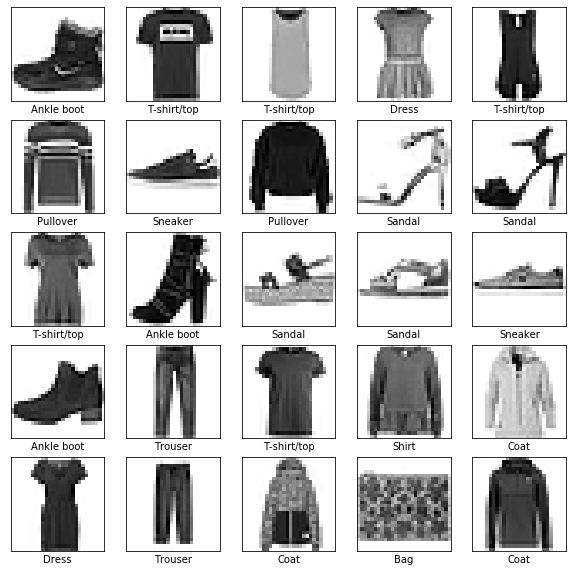

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/sample - loss: 13001.6378 - accuracy: 0.2075 - loss: 1
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 2781.7175 - accuracy: 0.1321 ETA: 2s - loss: 4259.6712  - ETA: 1s - loss:
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 83.3091 - accuracy: 0.1078
Epoch 4/10
60000/60000 [==============================] - 6s 93us/sample - loss: 8.9434 - accuracy: 0.1111
Epoch 5/10
60000/60000 [==============================] - 5s 88us/sample - loss: 8.8863 - accuracy: 0.1125
Epoch 6/10
60000/60000 [==============================] - 6s 96us/sample - loss: 8.7962 - accuracy: 0.1140
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 8.7044 - accuracy: 0.1104s - loss: 8.7110 - ac
Epoch 8/10
60000/60000 [==============================] - 4s 75us/sample - loss: 8.7830 - accuracy: 0.1061
Epoch 9/10
60000/60000 [============

In [24]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 8.5436 - accuracy: 0.1111

Test accuracy: 0.1111


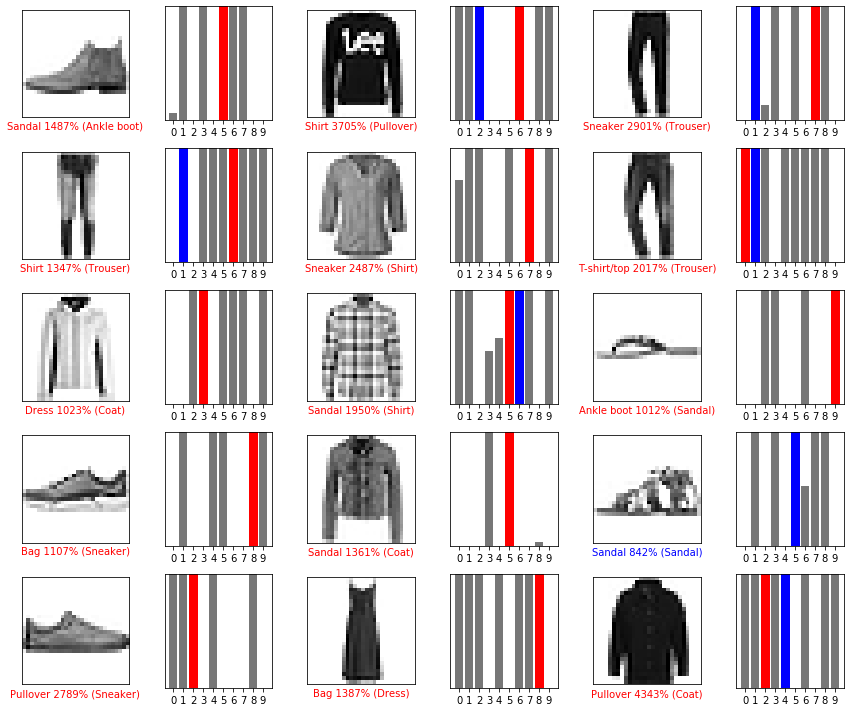

In [20]:
predictions = model.predict(test_images)


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
 
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [28]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

# Build model.
model = tf.keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  tfp.layers.DenseFlipout(10, activation='softmax'),
])

# Do inference.
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/sample - loss: 333.2275 - accuracy: 0.1414
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 20.4733 - accuracy: 0.1391
Epoch 3/10
60000/60000 [==============================] - 5s 85us/sample - loss: 21.0315 - accuracy: 0.1363
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 21.1584 - accuracy: 0.1377
Epoch 5/10
60000/60000 [==============================] - 6s 99us/sample - loss: 21.1176 - accuracy: 0.1385
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 21.2329 - accuracy: 0.1362
Epoch 7/10
60000/60000 [==============================] - 5s 84us/sample - loss: 21.1223 - accuracy: 0.1400
Epoch 8/10
60000/60000 [==============================] - 5s 86us/sample - loss: 21.1749 - accuracy: 0.1381
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 21.1323 - accuracy: 0.1403
Epoc

NameError: name 'x_tst' is not defined

In [14]:
!pip install --upgrade tensorflow-probability

    100% |████████████████████████████████| 2.5MB 10.6MB/s ta 0:00:01
You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Middle - 2
Create a simple model in TensorFlow Probability & TensorFlow 2.0

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    tfp.layers.DenseFlipout(
        units=10,
        activation=None,
        kernel_posterior_fn=tfp.layers.default_mean_field_normal_fn(),
        bias_posterior_fn=tfp.layers.default_mean_field_normal_fn())
])

Move over that linear regression model using probability distributions and optimizer

https://medium.com/tensorflow/regression-with-probabilistic-layers-in-tensorflow-probability-e46ff5d37baf

## Let's now adapt that same model using TensorFlow Probability.

Wish to use the same model (cars), butn focusing only on one piece of it.

## Late middle: - 3
Build a simple neural network using TensorFlow 2.0

## Late late middle - 4

Build a simple neural network using TensorFlow Probability (adapting Thomas Wiecki)

https://github.com/blei-lab/edward/blob/master/examples/bayesian_nn.py

Followed by: https://www.tensorflow.org/probability/api_docs/python/tfp/layers/DenseReparameterization

## Penultimate: - 5
Build a convolutional neural network with TensorFlow 2.0

Easy convolutional neural network

https://www.tensorflow.org/tutorials/keras/classification

## End goal: -6

Building a probabilistic convolutional neural network with TensorFlow Probability & TensorFlow 2.0

Probabilistic convolutional neural network with flipout

Key idea: learn probability distributions over parameter space

https://medium.com/python-experiments/bayesian-cnn-model-on-mnist-data-using-tensorflow-probability-compared-to-cnn-82d56a298f45